In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# Read dataset file
df = pd.read_csv('BNB.csv',sep=";")
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
# Split the data into training, testing, and validation sets by 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10107.898, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10172.680, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10142.506, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10148.224, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10172.459, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10126.436, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10131.189, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10109.199, Time=1.67 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10109.376, Time=1.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10138.477, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10125.982, Time=0.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10130.570, Time=0.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10095.539, Time=1.93 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=10091.484, Time=2.17 sec
 ARIMA(4,1,2)(0,0,0

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# make predictions on the validate set
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [6]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 332.3937061611008
Testing RMSE: 288.8306322889591
Validation MAPE: 112.37316387547676
Testing MAPE: 88.2233037989812
Validation MAE: 331.32873386027313
Testing MAE: 269.59230720576966


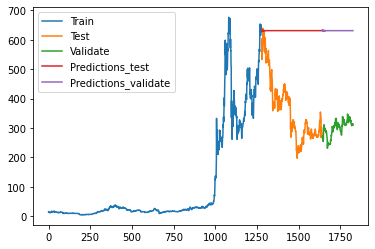

In [7]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()